In [19]:
# Illustration of the constraints that the convolutional is putting on the variance explained


In [1]:
# imports

import urllib
from urllib.request import urlretrieve
from IPython.display import display
from PIL import Image
import numpy as np
import tarfile
from scipy.misc import imsave, comb
from collections import Counter
import matplotlib as mpl
import h5py
from skimage import io
from matplotlib import gridspec
import matplotlib.collections
import matplotlib.patches as patches
from collections import Counter
import operator
import imageio
imageio.plugins.ffmpeg.download()
import os
import nibabel as nib
from nibabel.testing import data_path
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import time
from scipy import ndimage
from scipy.io import loadmat, savemat
import pickle
import sys
from sklearn.decomposition import PCA
import pylab
from mpl_toolkits.mplot3d import Axes3D
from joblib import Parallel, delayed
import multiprocessing
import ipywidgets as widgets
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.video.fx.all import crop
from numpy import cross, eye, dot
from sklearn.decomposition import NMF
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from scipy.stats.mstats import zscore
import timeit
import sklearn.cluster
import scipy.signal
import scipy.interpolate as interpolate


import keras.backend as K
K.set_image_data_format('channels_last')
from keras.models import Sequential, Model
from keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Input
from keras.layers import Conv2DTranspose, Reshape, Activation, Cropping2D, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal
from keras.optimizers import RMSprop, SGD, Adam
import keras
import tensorflow as tf

import math


%matplotlib inline

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


(299, 299)
999980000100.0001


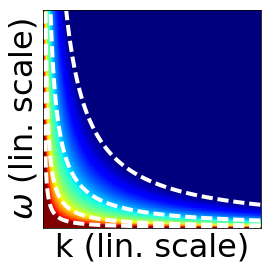

In [34]:
NFREQ = 300 # discretization
f1 = 1e-6 # lowest freq
f2 = 1e-1 # highest freq


## equilibrated trapezoid
N = 1 # noise level

## Generate spectrum

X = np.linspace(f1,f2,NFREQ)
T = np.linspace(f1,f2,NFREQ)

GX,GT = np.meshgrid(X[:-1],T[:-1])

# Power density
Sdensity = 1/(GX**2*GT**2)
S = np.diff(-1/X)[:,np.newaxis]*np.diff(-1/T)[:,np.newaxis].T

print(S.shape)

# Total Power
total_S = np.sum(S)

print(total_S)


plt.figure(figsize = (4,4))
#plt.axis('off')
plt.xticks([])
plt.yticks([])
#plt.axis('equal')
plt.imshow(np.log(S)/np.log(10), origin='lower',cmap='jet', vmin = -1, vmax = 2)
plt.contour(np.log(S)/np.log(10), np.arange(-1,3,1),linewidths = 4, linestyles = 'dashed',colors = 'w')
plt.xlabel('k (lin. scale)', fontsize = 32)
plt.ylabel(r'$\omega$ (lin. scale)', fontsize = 32)
#plt.colorbar()

#plt.ylim([0,np.log(100)])
#plt.xlim([0,np.log(100)])

plt.savefig('foo0.eps')

(299, 299)
999980000099.9994


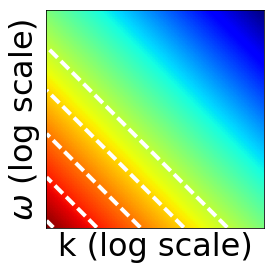

In [35]:
NFREQ = 300 # discretization
f1 = 1e-6 # lowest freq
f2 = 1e-1 # highest freq


## equilibrated trapezoid
N = 1 # noise level

## Generate spectrum

X = np.exp(np.linspace(np.log(f1),np.log(f2),NFREQ))
T = np.exp(np.linspace(np.log(f1),np.log(f2),NFREQ))

GX,GT = np.meshgrid(X[:-1],T[:-1])

# Power density
Sdensity = 1/(GX**2*GT**2)
S = np.diff(-1/X)[:,np.newaxis]*np.diff(-1/T)[:,np.newaxis].T

print(S.shape)

# Total Power
total_S = np.sum(S)

print(total_S)


plt.figure(figsize = (4,4))
#plt.axis('off')
plt.xticks([])
plt.yticks([])
#plt.axis('equal')
#plt.contour(np.log(S)/np.log(10), np.arange(5,10,1), linewidths = 2, linestyles = 'solid')
plt.imshow(np.log(S)/np.log(10), origin='lower',cmap='jet')
plt.contour(np.log(S)/np.log(10), np.arange(5,10,1),linewidths = 4, linestyles = 'dashed',colors = 'w')
plt.xlabel('k (log scale)', fontsize = 32)
plt.ylabel(r'$\omega$ (log scale)', fontsize = 32)
#plt.colorbar()

#plt.ylim([0,np.log(100)])
#plt.xlim([0,np.log(100)])

plt.savefig('foo1.eps')

(299, 299)
999980000100.0001


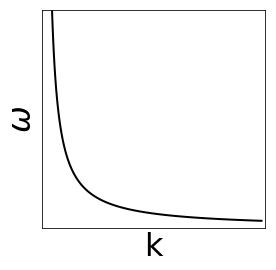

In [3]:
NFREQ = 300 # discretization
f1 = 1e-6 # lowest freq
f2 = 1e-1 # highest freq


## equilibrated trapezoid
N = 1 # noise level

## Generate spectrum

X = np.linspace(f1,f2,NFREQ)
T = np.linspace(f1,f2,NFREQ)

GX,GT = np.meshgrid(X[:-1],T[:-1])

# Power density
Sdensity = 1/(GX**2*GT**2)
S = np.diff(-1/X)[:,np.newaxis]*np.diff(-1/T)[:,np.newaxis].T

print(S.shape)

# Total Power
total_S = np.sum(S)

print(total_S)


plt.figure(figsize = (4,4))
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
#plt.contour(np.log(S)/np.log(10), np.arange(-1,4,1), linewidths = 2, linestyles = 'solid')
plt.contour(np.log(S)/np.log(10), np.arange(0,1,1),linewidths = 2, linestyles = 'solid',colors = 'k')
plt.xlabel('k', fontsize = 32)
plt.ylabel(r'$\omega$', fontsize = 32)
#plt.colorbar()

#plt.ylim([0,np.log(100)])
#plt.xlim([0,np.log(100)])

plt.savefig('foo2.png')

NameError: name 'S' is not defined

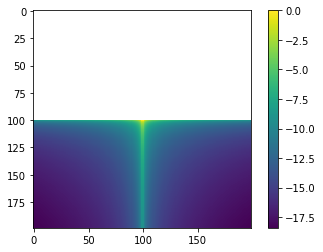

In [2]:
X = np.arange(-100,100)
Y = np.arange(-100,100)
T = np.arange(-100,100)

GX,GT = np.abs(np.meshgrid(X,T))

P = 1/(GX**2*GT**2)

P = np.concatenate((P[:100,:], P[101:,:]),axis = 0)
P = np.concatenate((P[:,:100], P[:,101:]),axis = 1)
#P = np.concatenate((P[:,:,:50], P[:,:,51:]),axis = 2)


#S = P>1e-2
P[T<0,:]= 0
plt.imshow(np.log(P))
plt.colorbar()

x,y = np.where(S)

print(x.shape,y.shape,z.shape)


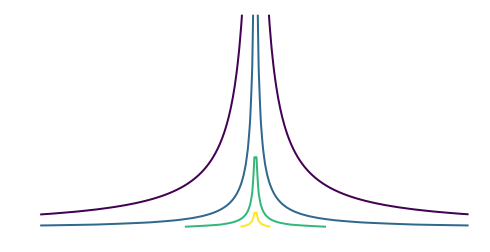

In [10]:

plt.figure(figsize = (8,4))
plt.axis('off')
plt.axis('equal')
plt.contour(X[:-1],T[:-1],np.log(P), np.arange(-13,-1,3), linewidths = 2, linestyles = 'solid')
plt.ylim([-.5,100])
plt.xlim([-100,100])

plt.savefig('foo.eps')

In [15]:
NFREQ = 300 # discretization
f1 = 1e-6 # lowest freq
f2 = 1e-1 # highest freq


## equilibrated trapezoid
N = 1 # noise level

## Generate spectrum

X = np.exp(np.linspace(np.log(f1),np.log(f2),NFREQ))
T = np.exp(np.linspace(np.log(f1),np.log(f2),NFREQ))

GX,GT = np.meshgrid(X[:-1],T[:-1])

# Power density
Sdensity = 1/(GX**2*GT**2)
S = np.diff(-1/X)[:,np.newaxis]*np.diff(-1/T)[:,np.newaxis].T

print(S.shape)

# Total Power
total_S = np.sum(S)

print(total_S)


(299, 299)
999980000100.0


In [30]:
np.log(S)/np.log(10)

array([[ 9.15436026,  9.13763785,  9.12091544, ...,  4.20452748,
         4.18780507,  4.17108267],
       [ 9.13763785,  9.12091544,  9.10419303, ...,  4.18780507,
         4.17108267,  4.15436026],
       [ 9.12091544,  9.10419303,  9.08747063, ...,  4.17108267,
         4.15436026,  4.13763785],
       ..., 
       [ 4.20452748,  4.18780507,  4.17108267, ..., -0.74530529,
        -0.7620277 , -0.77875011],
       [ 4.18780507,  4.17108267,  4.15436026, ..., -0.7620277 ,
        -0.77875011, -0.79547252],
       [ 4.17108267,  4.15436026,  4.13763785, ..., -0.77875011,
        -0.79547252, -0.81219493]])

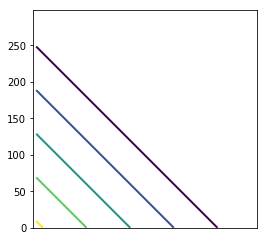

In [46]:
plt.figure(figsize = (4,4))
#plt.axis('off')
plt.xticks([])
plt.axis('equal')
plt.contour(np.log(S)/np.log(10), np.arange(5,10,1), linewidths = 2, linestyles = 'solid')
#plt.ylim([0,np.log(100)])
#plt.xlim([0,np.log(100)])

plt.savefig('foo.eps')

In [36]:
np.log(P)

array([[-15.64809202, -15.60768661, -15.56644803, ..., -15.52434121,
        -15.56644803, -15.60768661],
       [-15.60768661, -15.56728119, -15.52604262, ..., -15.4839358 ,
        -15.52604262, -15.56728119],
       [-15.56644803, -15.52604262, -15.48480404, ..., -15.44269723,
        -15.48480404, -15.52604262],
       ..., 
       [-15.52434121, -15.4839358 , -15.44269723, ..., -15.40059041,
        -15.44269723, -15.4839358 ],
       [-15.56644803, -15.52604262, -15.48480404, ..., -15.44269723,
        -15.48480404, -15.52604262],
       [-15.60768661, -15.56728119, -15.52604262, ..., -15.4839358 ,
        -15.52604262, -15.56728119]])